In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Page Views')]

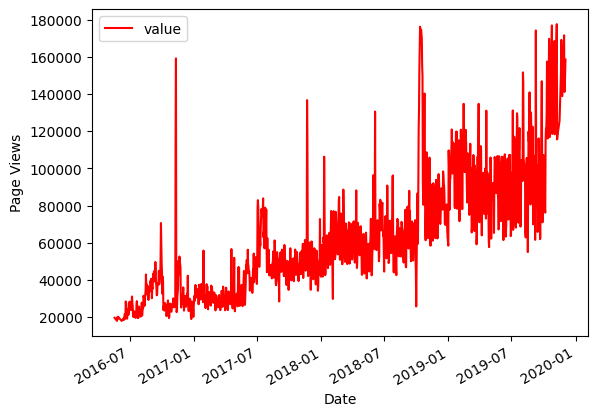

In [35]:
df = pd.read_csv("./fcc-forum-pageviews.csv", index_col='date', parse_dates=True)
df = df[(df["value"]< df["value"].quantile(0.975)) & (df["value"]> df["value"].quantile(0.025))]
# idx = pd.date_range('2016-01-01', '2019-12-31')
# df = df.reindex(idx, fill_value=np.nan)

df.plot(color="r").set(xlabel="Date", ylabel="Page Views")


In [23]:
df_bar = df.copy()
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()
df_bar = df_bar.groupby(['year', "month"])['value'].mean()
# df_bar = df_bar.sort_index(level=[0,1], ascending=[False, True]).unstack()
df_bar = df_bar.reset_index().fillna(0.0)
df_bar

,year,month,value
0,2016,April,0.000000
1,2016,August,31049.193548
2,2016,December,27832.419355
3,2016,February,0.000000
4,2016,January,0.000000
5,2016,July,24109.678571
6,2016,June,21875.105263
7,2016,March,0.000000
8,2016,May,19432.400000
9,2016,November,40448.633333


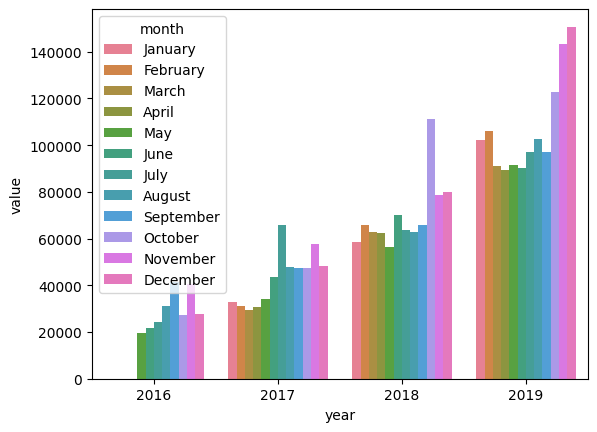

In [21]:
fig, ax = plt.subplots()
order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plot_bar = sns.barplot(data=df_bar, x='year', y='value', hue='month', hue_order=order,legend=True,ax=ax)
# plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], title="Months")
plt.show()

In [5]:
# fig = df_bar.plot.bar(figsize=(12,9)).figure
# plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], title="Months")

In [20]:
bars = []
ax = fig.axes[0]
for item in ax.get_children():
    if isinstance(item, mpl.patches.Rectangle):
        bars.append(item)
len(bars)


49